In [1]:
from data.data import load_physical_data
import pandas as pd
import numpy as np

In [2]:
df_physical = load_physical_data()

In [3]:
# surface 
df_physical

,Orientation (deg),Crystallinity (%),Strength (MPa)
0,0.00,30.00,221.608725
1,0.00,75.00,254.913360
2,0.00,30.00,219.289259
3,0.00,41.25,245.220929
4,0.00,52.50,187.546049
5,0.00,63.75,256.359249
6,0.00,75.00,239.538392
7,11.25,30.00,205.707447
8,11.25,41.25,206.983226
9,11.25,52.50,233.985793


In [4]:
from matplotlib import pyplot as plt

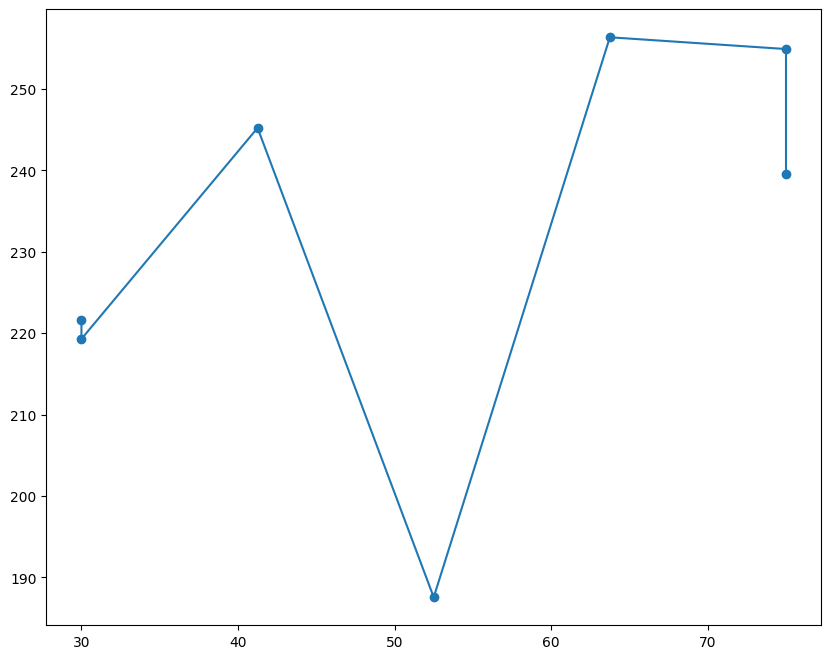

In [5]:
df_c_zero = df_physical[df_physical['Orientation (deg)'] == 0.0]
df_c_zero = df_c_zero.drop(columns=['Orientation (deg)'])
# sort by crystallinity
df_c_zero = df_c_zero.sort_values(by='Crystallinity (%)')

plt.figure(figsize=(10, 8))
plt.plot(df_c_zero['Crystallinity (%)'], df_c_zero['Strength (MPa)'], '-o', label='Crystallinity vs Strength')

Text(0.5, 1.0, 'Strength (MPa) vs Orientation and Crystallinity')

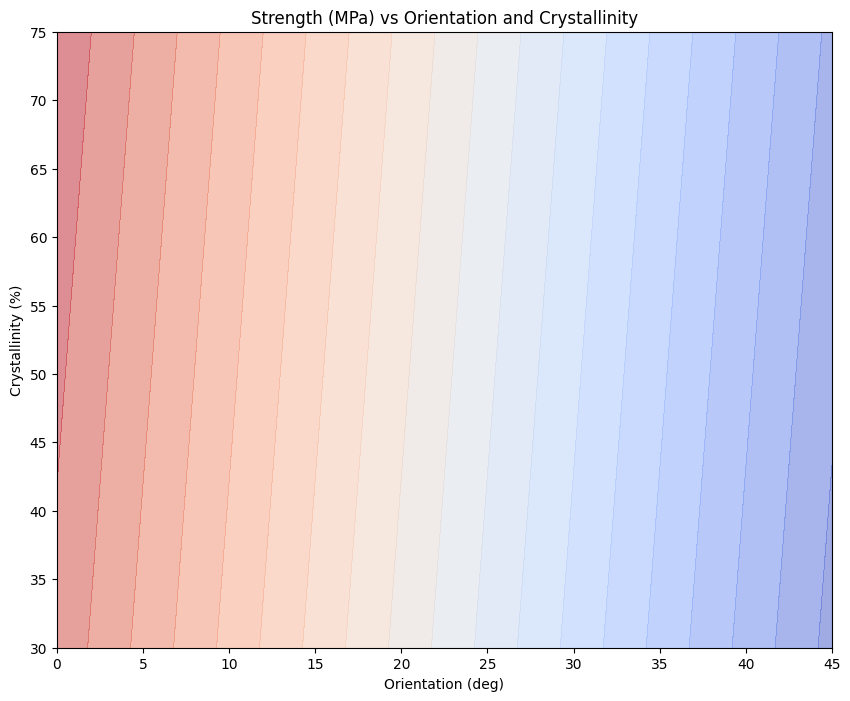

In [6]:
orientation   = np.array(df_physical['Orientation (deg)'])
crystallinity = np.array(df_physical['Crystallinity (%)'])
strength      = np.array(df_physical['Strength (MPa)'])

# plot contourf and scatter
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
# Create grid points
xi = np.linspace(orientation.min(), orientation.max(), 100)
yi = np.linspace(crystallinity.min(), crystallinity.max(), 100)
xi, yi = np.meshgrid(xi, yi)
# Interpolate the strength values on the grid

zi = griddata((orientation, crystallinity), strength, (xi, yi), method='cubic')

# linear regression 2D orientation, crystallinity -> strength
from sklearn import linear_model

# Prepare the data for linear regression
X = np.column_stack((orientation, crystallinity))
y = strength
# Create a linear regression model
model = linear_model.LinearRegression()
# Fit the model
model.fit(X, y)

# Predict the strength values using the model
strength_pred = model.predict(np.column_stack((xi.ravel(), yi.ravel())))
# Reshape the predicted values to match the grid shape
strength_pred = strength_pred.reshape(xi.shape)
# Plot the predicted strength values
ax.contourf(xi, yi, strength_pred, 20, cmap=cm.coolwarm, alpha=0.5)


# Plot the surface
# surf = ax.contourf(xi, yi, zi, 20, cmap=cm.jet, alpha=0.8)
# Plot the scatter points
# colorbar 
# plt.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Strength (MPa)')
# labels
ax.set_xlabel('Orientation (deg)')
ax.set_ylabel('Crystallinity (%)')
ax.set_title('Strength (MPa) vs Orientation and Crystallinity')

Text(0.5, 0.92, 'Strength (MPa) vs Orientation and Crystallinity')

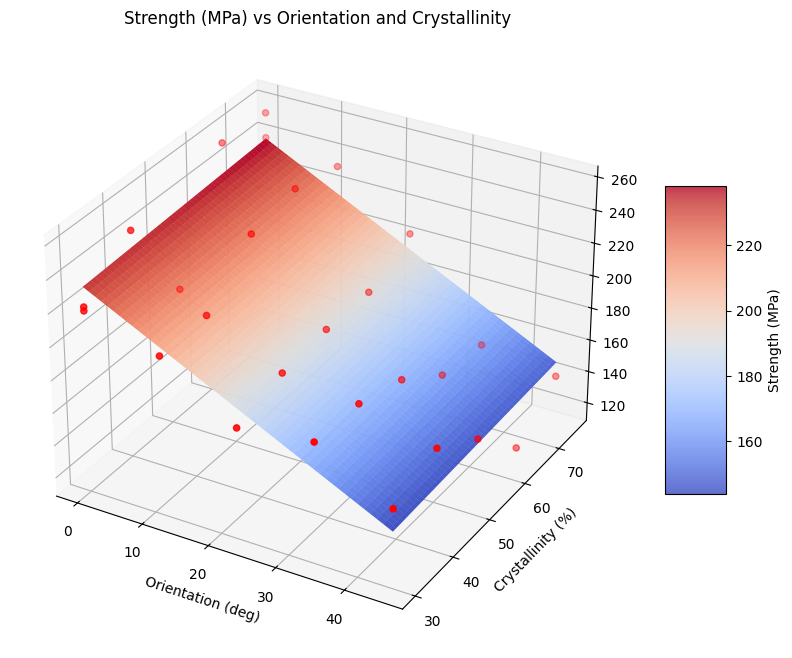

In [7]:
#surface 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xi, yi, strength_pred, cmap=cm.coolwarm, alpha=0.8)
# scatter points
ax.scatter(orientation, crystallinity, strength, c='r', marker='o', label='Data Points')
plt.colorbar(ax.plot_surface(xi, yi, strength_pred, cmap=cm.coolwarm, alpha=0.8), ax=ax, shrink=0.5, aspect=5, label='Strength (MPa)')
plt.ylabel('Crystallinity (%)')
plt.xlabel('Orientation (deg)')
plt.title('Strength (MPa) vs Orientation and Crystallinity')

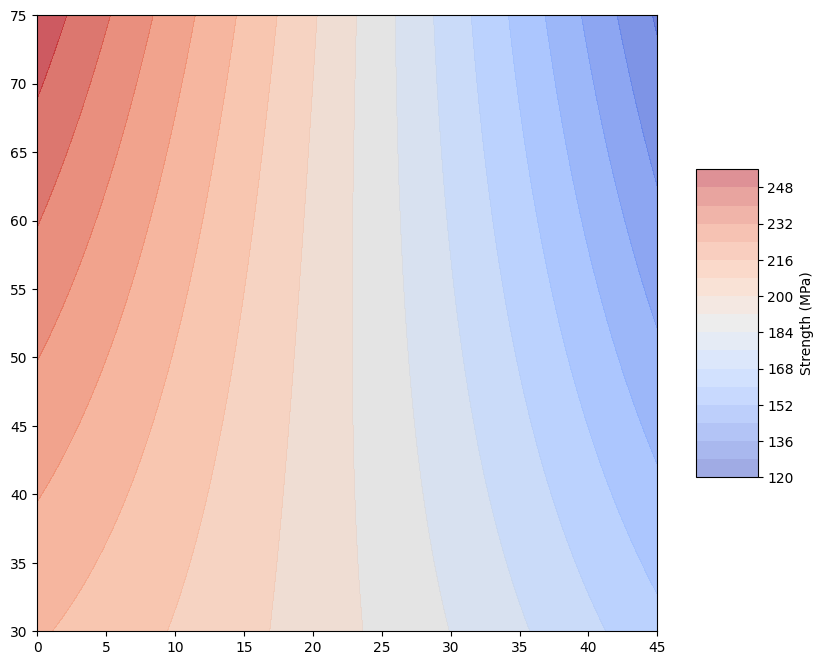

In [9]:
# polinomial regression
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features
poly = PolynomialFeatures(degree=2)
# Transform the data
X_poly = poly.fit_transform(X)
# Create a linear regression model
poly_model = linear_model.LinearRegression()
# Fit the model
poly_model.fit(X_poly, y)
# Predict the strength values using the model
strength_poly_pred = poly_model.predict(poly.fit_transform(np.column_stack((xi.ravel(), yi.ravel()))))
# Reshape the predicted values to match the grid shape
strength_poly_pred = strength_poly_pred.reshape(xi.shape)
# Plot the predicted strength values
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.contourf(xi, yi, strength_poly_pred, 20, cmap=cm.coolwarm, alpha=0.5)
# Plot the surface
# colorbar 
plt.colorbar(ax.contourf(xi, yi, strength_poly_pred, 20, cmap=cm.coolwarm, alpha=0.5), ax=ax, shrink=0.5, aspect=5, label='Strength (MPa)')

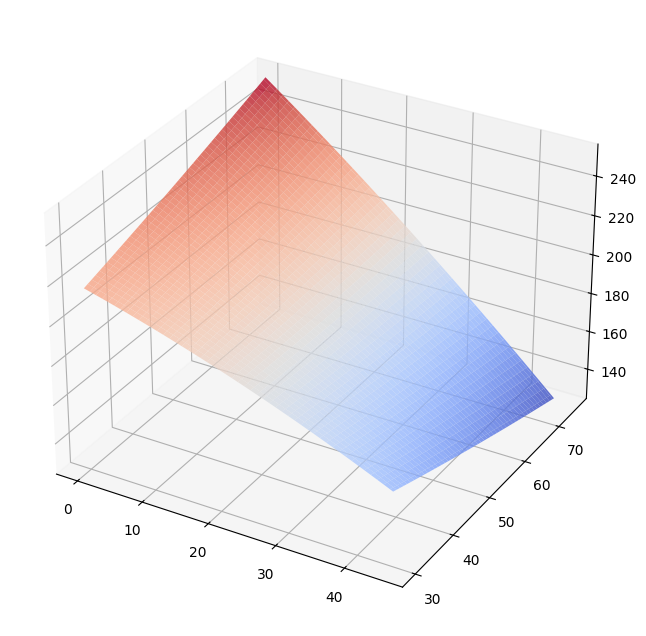

In [10]:
# crystallinity == 0 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xi, yi, strength_poly_pred, cmap=cm.coolwarm, alpha=0.8)

In [11]:
from data.data import load_density_data
df_density = load_density_data()
df_density

ImportError: cannot import name 'load_density_data' from 'data.data' (/home/djoroya/projects/DIMAT/M03_AITEX_YARN/DIMAT_DATA_CLEAN_AITEX/src/data/data.py)